# Игры — Формирование модели монетизации

## Описание проекта

**Основная задача проекта** - сформировать модель монетизации игрового приложения.

Многие игры зарабатывают с помощью рекламы. И все они сталкиваются с противоречием;

- Пользователь разозлится и уйдёт, если начать показывать ему рекламу раньше, чем игра его затянет.
- Но  чем позже создатели игры включат рекламу, тем меньше они заработают.
 
**Этапы проекта:**

1. Провести исследовательский анализ данных;

2. Проанализировать влияние событий на совершение целевого действия

3. Оценить окупаемость рекламы

4. Проверить статистические гипотезы:

    - Проверить гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.
    - Проверить статистически значимые различия в количестве рекламных показов по старой модели и по новой модели.

### Описание данных

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_costs.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

## Вывод

- В среднем, скорость прохождения уровня при стратегии, по которой происходит победа над противником выше. 

- Количество рекламы по новой модели должно увеличиться, не сильно влияя на вовлеченность. 
        
**Вывод по исследованию:**

   Исходя из полученных данных мы делаем вывод, что привязка монетизации к демонстрации рекламы во время нахождения игрока в режиме строительства сохраняет за заказчиком контроль окупаемости, но без проведения эксперимента мы не можем сделать выводы о сохранении вовлеченности игроков при такой модели.  
    
   Была предложена модель, при которой демонстрация рекламы частично производится на экране строительства (когда, например, игрок строит `spaceport` и когда игрок сам контролирует возможность просмотра рекламы и получает за это выгоду). Опять-таки для такой модели так же нужно провести эксперимент. 
    
   Есть еще одна побочная модель, при которой игрок смотрит рекламу ограниченно и монетизация производится только за счет решения игрока. Она должна быть столько же выгодной и при этом увлекать игрока, потому что показы он контролирует сам. 
    

## Шаг 1. Загрузка данных и подготовка их к анализу

### Импорт библиотек

In [1]:
import pandas as pd #для обработки и анализа данных
import numpy as np #поддержка таблиц и математических функций
import datetime as dt #для работы с датой и временем
from datetime import datetime 
from datetime import timedelta#для проведений манипуляций и расчетов со временем и отображения продолжительности
from matplotlib import pyplot as plt #для визуализации данных
import seaborn as sns
import scipy.stats as sts#для статистических расчетов
import math as mth #для работы с математическими функциями и константами

### Загрузка данных

In [2]:
#Загрузка данных:
ad_costs = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\ad_costs.csv')
game_actions = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\game_actions.csv')
user_source = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\user_source.csv')
# Cимвол r - префикс, который указывает, что специальные символы в виде\ не должны оцениваться.
# Ошибка, которая может возникнуть без использования этого префикса связана с тем, что в Windows и Linux
# разные разделители путей.

In [3]:
#Просмотр содержания ad_costs:

display(ad_costs)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [4]:
#Просмотр содержания game_actions:
display(game_actions)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [5]:
#Просмотр содержания и типов данных для user_source:
display(user_source)
user_source.info()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


### Выполнение предобработки

####  Проверка на наличие дубликатов и пропусков. Удаление дубликатов.

In [6]:
#поиск явных дубликатов:
print(f'Дубликаты ad_costs: {ad_costs.duplicated().sum()}')
print(f'Дубликаты game_actions: {game_actions.duplicated().sum()}')
print(f'Дубликаты user_source: {user_source.duplicated().sum()}')

Дубликаты ad_costs: 0
Дубликаты game_actions: 1
Дубликаты user_source: 0


In [7]:
#проверка найденных явных дубликатов:
display(game_actions[game_actions.duplicated(keep='first')])
display(game_actions[game_actions.duplicated(keep='last')])

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [8]:
#удаление явных дубликатов:
game_actions = game_actions[~game_actions.duplicated(keep=False)]
print(f'Дубликаты game_actions: {game_actions.duplicated().sum()}')

Дубликаты game_actions: 0


In [9]:
#проверка на наличие пропусков в game_actions: 'satellite_orbital_assembly'
game_actions.isnull().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133772
dtype: int64

Пропуски есть в двух столбцах. Посмотрим, что эти пропуски из себя предстваляют.

In [10]:
#Проверка пропусков:
#в building type пропусков не так много, посмотрим на датасет только с пропусками из этого столбца:
check_building = game_actions[game_actions['building_type'].isnull()]
#в зproject_type пропусков - преимущественное количество, посмотрим на датасет без них:
check_project = game_actions[game_actions['project_type'].notnull()]

print('\033[1m' + f"\n Уникальные значения событий в датасете с пропусками в столбце 'building_type':\033[0m {check_building['event'].unique()}")
print('\033[1m' + f"\n Уникальные значения 'project_type' в датасете без пропусков в столбце 'project_type': \033[0m {check_project['project_type'].unique()}",
      '\033[1m' + f"\n\n Уникальные значения событий в датасете без пропусков в столбце 'project_type': \033[0m {check_project['event'].unique()}")


 Уникальные значения событий в датасете с пропусками в столбце 'building_type': ['finished_stage_1' 'project']

 Уникальные значения 'project_type' в датасете без пропусков в столбце 'project_type':  ['satellite_orbital_assembly'] 

 Уникальные значения событий в датасете без пропусков в столбце 'project_type':  ['project']


Судя по всему, удалять или как-то менять значения в столбцах с пропусками не стоит. Этих данных нет по причине. В типе здания просто не должен быть указан тип, т.к. события постройки здания просто не было, а в типе проекта просто не было завершенного проекта. 

In [11]:
#проверка на наличие пропусков в ad_costs:
ad_costs.isnull().sum()

source    0
day       0
cost      0
dtype: int64

In [12]:
#проверка на наличие пропусков в user_source:
user_source.isnull().sum()

user_id    0
source     0
dtype: int64

В остальных датасетах проблем с пропусками не замечено. 

Данные являются логами, так что сомневаться в отсутствии неявных дубликатов не приходится. 

#### Проверка и изменение типов данных

In [13]:
#Проверка основной информации и типов данных по датасетам:
print('\033[1m' + "Проверка основной информации и типов данных по датасетам:\n" + '\033[0m')
ad_costs.info();
print("\n \n")
game_actions.info();
print("\n \n")
user_source.info();

Проверка основной информации и типов данных по датасетам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes

 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135638 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135638 non-null  object
 1   event           135638 non-null  object
 2   building_type   127955 non-null  object
 3   user_id         135638 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 6.2+ MB

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   No

In [14]:
#заменим тип данных в ad_costs в колонке "day":
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
#ad_costs.info() #убрать хештег в начале кода для проверки
#display(ad_costs) #убрать хештег в начале кода для проверки

#заменим тип данных в game_actions в колонке "event_datetime":
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
#game_actions.info() #убрать хештег в начале кода для проверки
#display(game_actions) #убрать хештег в начале кода для проверки

Изменение типа object на datetime позволяет нам производить в дальнейшем манипуляции с этой колонкой. Иначе работать с колонкой будет проблематично.

#### Создание дополнительных столбцов для анализа в датасете game_actions

Для упрощения анализа, создадим в датасете game_actions дополнительные столбцы.

In [15]:
game_actions['date'] = game_actions['event_datetime'].dt.date #создание колонки date в датафрейме game_actions 
df = game_actions.merge(user_source, on='user_id', how = 'outer') #объединяем датафрейм game_actions с user_source 
                                                                    #для создания колонки source
#создадим колонки 'first_daily_action' и 'last_daily_action'
df1 = df.copy()    
df1['building_type'] = df1['building_type'].fillna(' ')  #заполним пробелы 
#поиск минимальных дейттаймов 
df_min = df1.groupby(['user_id', 'date'])['event_datetime', 'event', 'building_type'].min().reset_index()
df_max = df1.groupby(['user_id', 'date'])['event_datetime', 'event', 'building_type'].max().reset_index()

#для создания пробелов в колонках:
df_min['event'] = df_min['event'].replace({'building':'building_'})
df_max['event'] = df_max['event'].replace({'building':'building_'})


df_min['first_daily_action'] = df_min['event'] + df_min['building_type']
df_max['last_daily_action'] = df_max['event'] + df_max['building_type']

df_min = df_min.drop(columns=['event', 'building_type', 'event_datetime'])
df_max = df_max.drop(columns=['event', 'building_type', 'event_datetime'])
#создаем датафрейм:
df2 = df_min.merge(df_max, on = ['user_id', 'date'], how='right')
df = df.merge(df2, on = ['user_id', 'date'], how='outer')

display(df.head(50))

C:\Users\Leron\AppData\Local\Temp\ipykernel_6260\1860058612.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_min = df1.groupby(['user_id', 'date'])['event_datetime', 'event', 'building_type'].min().reset_index()
C:\Users\Leron\AppData\Local\Temp\ipykernel_6260\1860058612.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_max = df1.groupby(['user_id', 'date'])['event_datetime', 'event', 'building_type'].max().reset_index()


,event_datetime,event,building_type,user_id,project_type,date,source,first_daily_action,last_daily_action
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
5,2020-05-08 08:16:51,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-08,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
6,2020-05-10 20:27:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-10,youtube_channel_reklama,building_assembly_shop,building_assembly_shop
7,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,facebook_ads,building_assembly_shop,building_assembly_shop
8,2020-05-06 23:49:25,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-06,facebook_ads,building_assembly_shop,building_assembly_shop
9,2020-05-07 03:56:30,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,facebook_ads,building_assembly_shop,building_spaceport


Функции для обработки профилей:

In [16]:
# Функция для создания профилей пользователей
def get_profiles(df, ad_costs):

    # находим параметры первых посещений
    profiles = (
        df.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg(
            {
                'event_datetime': 'first',
                'date': 'last',
                'event':'count',
                'source': 'first',
                'last_daily_action':'last'
            }
        )
        .rename(columns={'event_datetime': 'first_act', 'date':'last_act', 'event':'event_ammount', 'last_daily_action':'last_event'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    profiles['day'] = profiles['first_act'].dt.date
    profiles['day'] = pd.to_datetime(profiles['day'])#, format="%Y-%m-%d")


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['day', 'source'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['day', 'source'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['cost'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['day', 'source', 'acquisition_cost']],
        on=['day', 'source'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

    
    

## Шаг 2. Изучение и проверка данных

### Проверить, за какой период распологаем данными.

In [17]:
print(f"Период, которым распологает весь датасет: {df['event_datetime'].min()} - {df['event_datetime'].max()}") 
first_meet = df.loc[df.groupby(['user_id'])['event_datetime'].idxmin()]
print(f"Период набора тестовой когорты: {first_meet['event_datetime'].min()} - {first_meet['event_datetime'].max()}") 


Период, которым распологает весь датасет: 2020-05-04 00:00:01 - 2020-06-05 12:32:49
Период набора тестовой когорты: 2020-05-04 00:00:01 - 2020-05-10 23:59:52


<Figure size 1500x2000 with 0 Axes>

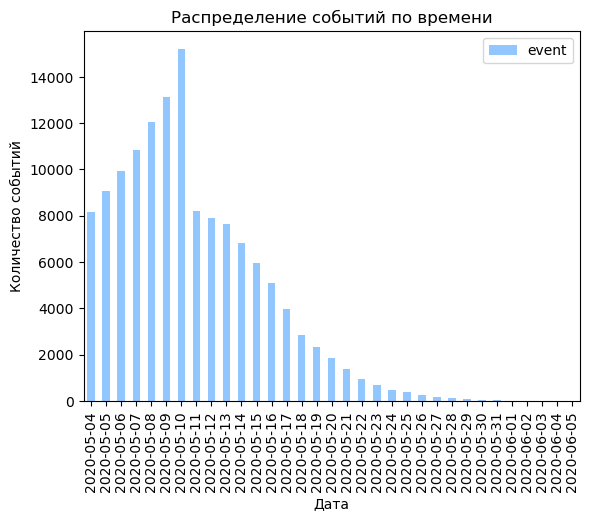

In [18]:
#Посмотрим визуализацию количества событий по времени:

event_cnt = df.groupby('date')[['event']].count() #Группируем события по датам, чтобы посмотреть, как они распределены по времени

plt.style.use('seaborn-pastel'); #Выбираем стиль визуализации
fig = plt.figure(figsize=(15, 20));
event_cnt.plot(kind='bar');

plt.title('Распределение событий по времени');
plt.xlabel('Дата');
plt.ylabel('Количество событий');

Похоже, что количество событий под конец датасета сходит на нет. По визуализации все в норме. Количество посетителей в тестовой когорте у нас ограниченное, все они либо завершают уровень, либо просто прекращают пользоваться приложением. 

Есть подьем 2020-05-10. 2020-05-10 был последний набор пользователей. Там совершали события и новые пользователи и пользователи, которые уже играют в игру со старта набора тестовой когорты. Поэтому количество событий в эту дату самое высокое. 

### Сколько всего событий в логе?

In [19]:
#Посчитаем количество событий в логе с помощью loc. Разделим датафрейм по типу событий:
building = df[df['event']=='building']
finished_stage_1 = df[df['event']=='finished_stage_1']
project = df[df['event']=='project']

print('\n Общее количество событий:', df['event'].count(),
      '\n\n\n Количество событий типа "building":', building['event'].count(),
      '\n\n\n Количество событий типа "finished_stage_1":', finished_stage_1['event'].count(),
      '\n\n\n Количество событий типа "project":', project['event'].count())


 Общее количество событий: 135638 


 Количество событий типа "building": 127955 


 Количество событий типа "finished_stage_1": 5817 


 Количество событий типа "project": 1866


Количество событий типа building превалирует. Построим визуализацию для наглядности:

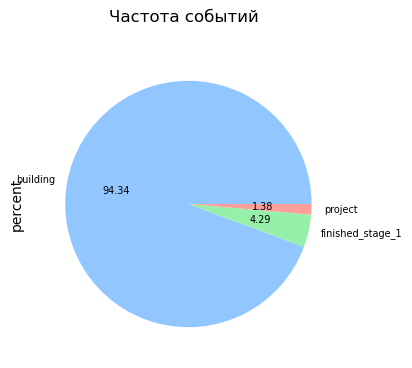

In [20]:
event = pd.DataFrame()
event['users_ammount'] = df.groupby('event')['user_id'].count()
event['percent'] = ((event['users_ammount']/df['event'].count())*100)
event.sort_values(by = 'percent', ascending=False)

event_int = event['percent'].plot(kind='pie', subplots=True, figsize=(4,4), 
                            autopct="%.2f", fontsize=7, legend = False, 
                            title = 'Частота событий');

Не удивительно, что заказчик остерегается того, что пользователи уйдут при просмотре рекламы, но так же не удивительно, почему он хочет использовать тип "building" для монетизации. 

### Сколько всего пользователей в логе? 

Общее количество уникальных пользователей должно совпадать с количеством строчек в датасете user_source, но мы проверим:

In [21]:
print('\n Общее количество уникальных пользователей:\n\n', df.agg({'user_id':'nunique'}),'\n');
user_source.info()


 Общее количество уникальных пользователей:

 user_id    13576
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [22]:
list_users = user_source['user_id'].unique()
check_df = df[df['user_id'].isin(list_users)]
sum_users = int(check_df.agg({'user_id':'nunique'}))

if ((check_df['user_id'].count()) == (df['user_id'].count())):
    print('Количество уникальных пользователей в user_source и df совпадает. Игроков:', sum_users)
else:
    print('Количество уникальных пользователей в user_source и df не совпадает.')

Количество уникальных пользователей в user_source и df совпадает. Игроков: 13576


Все верно, количество уникальных пользователей совпадает с количеством строчек в  в датасете user_source.

### Определить даты, в которые привлекалось больше всего пользователей.

Построим профили пользователей, а затем построим по ним визуализацию. Так будет проще работать.

In [23]:
#cоставляем профили пользователей
profiles = get_profiles(df, ad_costs)
profiles['day'] = profiles['day'].dt.date
display(profiles.sort_values(by='day').head(5))

,user_id,first_act,last_act,event_ammount,source,last_event,day,acquisition_cost
11656,dc2e179f-6e80-4340-bb8f-4cf148c9c090,2020-05-04 08:53:04,2020-05-12,15,instagram_new_adverts,building_spaceport,2020-05-04,0.346367
5657,6977049e-5cf2-4e5a-b62e-d350b2e330af,2020-05-04 14:56:37,2020-05-23,10,yandex_direct,building_spaceport,2020-05-04,0.266916
5656,6970f7c4-13ea-4d0e-b2ce-79dfaa9f2e4a,2020-05-04 06:43:50,2020-05-15,13,yandex_direct,project,2020-05-04,0.266916
11344,d6e3e5b2-0431-40ea-b337-214dc98683ce,2020-05-04 03:23:23,2020-05-15,12,instagram_new_adverts,finished_stage_1,2020-05-04,0.346367
11345,d6ef49dd-dec8-4877-96bd-185526def1da,2020-05-04 05:26:37,2020-05-12,13,yandex_direct,finished_stage_1,2020-05-04,0.266916


<Figure size 1500x1500 with 0 Axes>

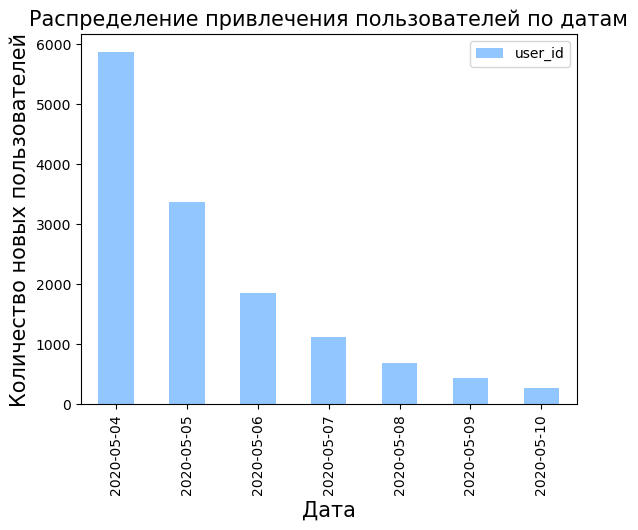

In [24]:
#Посмотрим визуализацию количества привлечения новых пользователей во времени:

users_cnt = profiles.groupby('day')[['user_id']].count() #Группируем пользователей по датам, чтобы посмотреть, как они распределены по датам
users_cnt = users_cnt.sort_values(by='user_id', ascending=False).reset_index()


fig = plt.figure(figsize=(15, 15));
users_cnt.plot(kind='bar', x='day', y='user_id');

plt.title('Распределение привлечения пользователей по датам', fontsize = 15);
plt.xlabel('Дата', fontsize = 15);
plt.ylabel('Количество новых пользователей', fontsize = 15);

plt.show()

Больше всего пользователей пришло в первый день рекламной кампании. Здесь нечему удивляться, все заинтересованные пользователи сразу перезодят по ссылкам. К тому же все зависит от количества вложений в каждый день рекламной кампании. 

Так же, возможно, был взят не очень удачный промежуток для анализа. Он не будет достаточно показательным, потому что экспериментальная когорта пользователей была набрана в майские праздники. Это вполне могло повлиять на количество привлеченных пользователей от 7-10 мая - все идут на шашлыки. С другой стороны в это время у интровертов больше времени на игры. 

### Из каких рекламных источников пришло больше всего пользователей?

<Figure size 1500x1500 with 0 Axes>

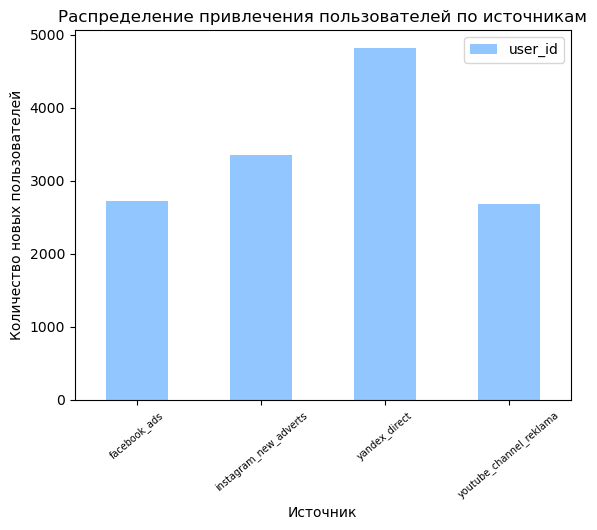

In [25]:
#Посмотрим визуализацию количества привлечения новых пользователей по источникам:

users_cnt = profiles.groupby('source')[['user_id']].count() #Группируем пользователей по источникам, чтобы посмотреть, как они распределены
fig = plt.figure(figsize=(15, 15));
users_cnt.plot(kind='bar');

plt.title('Распределение привлечения пользователей по источникам');
plt.xlabel('Источник');
plt.ylabel('Количество новых пользователей');
plt.xticks(rotation=40, fontsize=7);

Скорее всего из яндек директа пришло больше всего пользователей, потому что помимо показов рекламы в поисковой системе, у них так же есть сервисы-партнеры, где он может демонстрировать рекламу. 

### Вовлеченность пользователей

Хорошо бы посмотреть на вовлеченность пользователей, пришедших из разных источников. Хотя бы по имеющимся данным. 
Сначала посчитаем пользователей, которые в целом вовлечены в игровой процесс:

#### Количество пользователей, завершивших уровень

In [26]:
#Рассчитаем количество пользователей, завершивших уровень:
cnt_1 = df[df['event']=='finished_stage_1']
cnt_2 = df[df['project_type']=='satellite_orbital_assembly']

cnt= cnt_1['event'].count() + cnt_2['event'].count()
cnt_merge = cnt_1.merge(cnt_2, on='user_id', how='right')
# Посчитаем, какую долю от общего количества составляют эти пользователи:
percent = (cnt / profiles['user_id'].count()) * 100



print('\n Общее количество пользователей, совершивших целевое действие:', cnt,
      '\n Это составляет {p:.2f}% от общего количества уникальных пользователей.'.format(p=percent))


 Общее количество пользователей, совершивших целевое действие: 7683 
 Это составляет 56.59% от общего количества уникальных пользователей.


#### Затраты на рекламу

,source,cost
0,facebook_ads,2140.904643
1,instagram_new_adverts,2161.441691
2,yandex_direct,2233.111449
3,youtube_channel_reklama,1068.119204


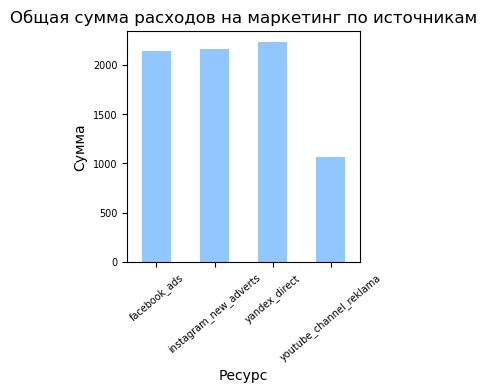

In [27]:
source_sum = ad_costs.groupby('source')['cost'].sum()
fig = plt.figure(figsize=(3, 3));
source_sum .plot(kind='bar', fontsize=7);

plt.title('Общая сумма расходов на маркетинг по источникам');
plt.xlabel('Ресурс');
plt.ylabel('Сумма');

display(source_sum.reset_index())
plt.xticks(rotation=40, fontsize=7);

Теперь считаем саму вовлеченность по источникам: 

#### Посчитаем вовлеченность пользователей

In [28]:
sources_1 = cnt_1.groupby('source')['user_id'].count()
sources_2 = cnt_2.groupby('source')['user_id'].count()
sources = sources_1 + sources_2
sources = pd.DataFrame(sources)
sources['привлечено'] = profiles.groupby('source')[['user_id']].count()
sources['отток'] = sources['привлечено'] - sources['user_id']
sources = sources.rename(columns={'user_id':'завершили_уровень'})

display(sources.sort_values(by = 'привлечено'))

,завершили_уровень,привлечено,отток
source,,,
youtube_channel_reklama,1538,2686,1148
facebook_ads,1541,2726,1185
instagram_new_adverts,1942,3347,1405
yandex_direct,2662,4817,2155


<Figure size 1000x1000 with 0 Axes>

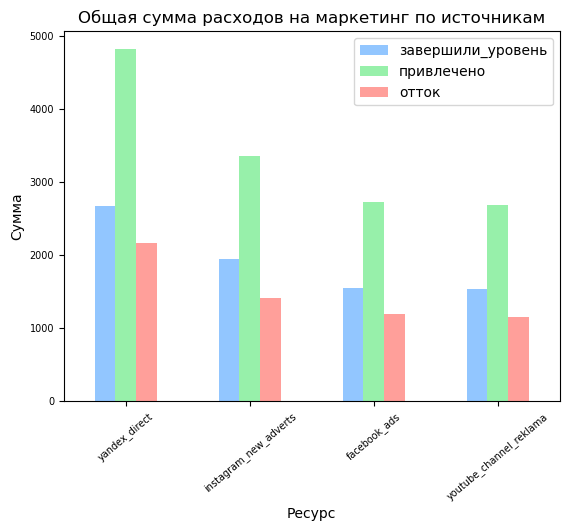

In [29]:
fig = plt.figure(figsize=(10, 10));
sources.sort_values(by = 'привлечено', ascending = False).plot(kind='bar', fontsize=7);

plt.title('Общая сумма расходов на маркетинг по источникам');
plt.xlabel('Ресурс');
plt.ylabel('Сумма');

plt.xticks(rotation=40, fontsize=7);

В целом затраты на рекламу по выбранным источникам себя оправдывают. Посмотрим так же на CAC.

#### CAC

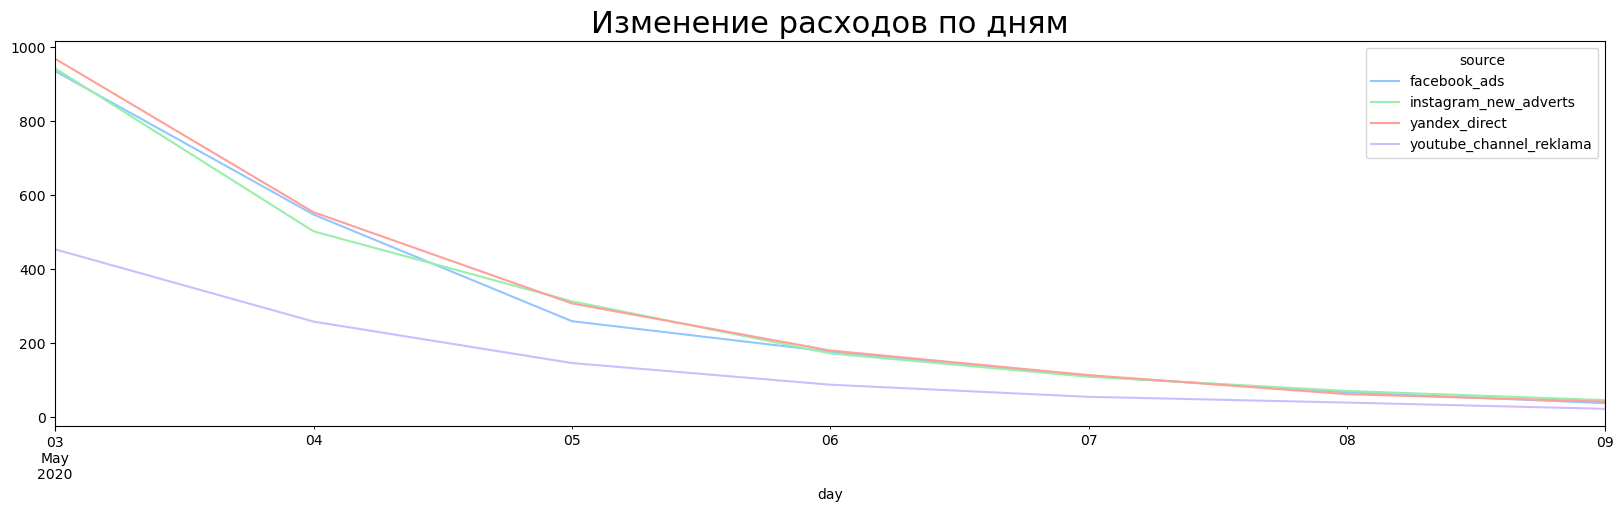

In [30]:
data = ad_costs.pivot_table(index='day', columns ='source', values = 'cost', aggfunc='sum')


plt1 = data.plot(figsize=(20,5))

plt1.set_title('Изменение расходов по дням', fontsize = 22);

In [31]:
user_source_1 = user_source.groupby('source')['user_id'].count()
add_ad_costs = ad_costs.groupby('source')['cost'].sum().reset_index()
add_ad_costs = add_ad_costs.merge(user_source_1, on = 'source', how = 'left')

add_ad_costs['acquisition_cost'] = add_ad_costs['cost']/add_ad_costs['user_id']
display(add_ad_costs)
add_ad_costs['mean_cost'] = add_ad_costs['acquisition_cost'].mean()
total_mean = add_ad_costs['mean_cost'].mean()
print('Cредний CAC по всему датафрейму: {}'.format(total_mean))

,source,cost,user_id,acquisition_cost
0,facebook_ads,2140.904643,2726,0.785365
1,instagram_new_adverts,2161.441691,3347,0.645785
2,yandex_direct,2233.111449,4817,0.463590
3,youtube_channel_reklama,1068.119204,2686,0.397662


Cредний CAC по всему датафрейму: 0.5731002471448883


По имеющимся данным сложно сказать что-то конкретное, кроме того, что, виузально кажется, что маркетинговый отдел очень грамотно распорядился с проведением рекламной компании. В рамках этого проекта нет цели улучшить деятельность маркетингового отдела, но лишний раз проверить, можно ли что-то улучшить здесь будет не лишним. 

### Сколько в среднем событий приходится на пользователя?

In [32]:
#Считаем количество событий по датам:
midle_event_1 = df.groupby('date')['event'].count().reset_index()
#Считаем количество уникальных пользователей по датам:
midle_event_2 = df.groupby('date').agg({'user_id':'nunique'}).reset_index()
#Считаем количество построек:
midle_event_3 = df.groupby('date')['building_type'].count().reset_index()
#Соединяем все в единый датасет:
midle_event = midle_event_1.merge(midle_event_3, on='date', how='outer')
midle_event = midle_event.merge(midle_event_2, on='date', how='outer')

#Считаем количество единиц зданий, построенных в течение разного времяни:
midle_event['events_per_h'] = midle_event['building_type']/24
midle_event['events_per_min'] = midle_event['building_type']/24/60

#Считаем количество пользователей, активных в течение разного времяни:
midle_event['users_per_h'] = midle_event['user_id']/24
midle_event['users_per_min'] = midle_event['user_id']/24/60

#Считаем какое количество зданий приходится на одного пользователя в разные промежутки времени:
midle_event['time_user'] = midle_event['events_per_h']/midle_event['users_per_h']
midle_event['day_user'] = midle_event['building_type']/midle_event['user_id']


midle_event['time_building'] = midle_event['building_type']/24
midle_event['sum_building'] = midle_event['building_type']*0.07
midle_event['sum_building_h'] = midle_event['time_building']*0.07


#display(midle_event)
print('\n Среднее количество событий в час на всех пользователей:', round(midle_event['events_per_h'].mean()),
     '\n Среднее количество событий в минуту:', round(midle_event['events_per_min'].mean()),
     '\n Среднее количество пользователей в час на все события:', round(midle_event['users_per_h'].mean()),
     '\n Среднее количество пользователей в минуту на все события:', round(midle_event['users_per_min'].mean()),
     '\n Среднее количество событий в час на 1 пользователя:', round(midle_event['time_user'].mean()),
     '\n Среднее количество событий с построкой в день на 1 пользователя:', round(midle_event['day_user'].mean()))

display(midle_event.head(5))


 Среднее количество событий в час на всех пользователей: 162 
 Среднее количество событий в минуту: 3 
 Среднее количество пользователей в час на все события: 120 
 Среднее количество пользователей в минуту на все события: 2 
 Среднее количество событий в час на 1 пользователя: 1 
 Среднее количество событий с построкой в день на 1 пользователя: 1


,date,event,building_type,user_id,events_per_h,events_per_min,users_per_h,users_per_min,time_user,day_user,time_building,sum_building,sum_building_h
0,2020-05-04,8171,8170,5860,340.416667,5.673611,244.166667,4.069444,1.394198,1.394198,340.416667,571.90,23.829167
1,2020-05-05,9055,9052,6382,377.166667,6.286111,265.916667,4.431944,1.418364,1.418364,377.166667,633.64,26.401667
2,2020-05-06,9925,9921,6854,413.375000,6.889583,285.583333,4.759722,1.447476,1.447476,413.375000,694.47,28.936250
3,2020-05-07,10858,10847,7384,451.958333,7.532639,307.666667,5.127778,1.468987,1.468987,451.958333,759.29,31.637083
4,2020-05-08,12059,12030,7891,501.250000,8.354167,328.791667,5.479861,1.524522,1.524522,501.250000,842.10,35.087500


В среднем пользователь совершает одно событие с постройкой в день. 

## Шаг 3. Исследование базовой модели монетизации. 

In [33]:
#Фильтруем датасет по типу событий и группируем для подсчета:
building_df = df[df['event']=='building']
building_df = building_df.groupby(['date'])['event'].count().reset_index()
#Считаем, сколько заработала базовая модель:
building_df['sum_money'] = building_df['event']*0.07
#Прибыль за исследуемый период
expenses_payback = building_df['sum_money'].sum() - ad_costs['cost'].sum()
#Процент окупаемости:
payback_percent = (building_df['sum_money'].sum()/ad_costs['cost'].sum())*100
#Срок окупаемости затрат при базовой модел
payback_period = round((ad_costs['cost'].sum()/building_df['sum_money'].sum())*30)

print('\n Срок окупаемости затрат при базовой модели:',  payback_period, 'дней',
      '\n \n Прибыль за исследуемый период:', round(expenses_payback),
      '\n \n Сумма затрат на рекламу по исследоваемому периоду:', round(ad_costs['cost'].sum()),
      '\n \n Процент окупаемости:', round(payback_percent), '%')


 Срок окупаемости затрат при базовой модели: 25 дней 
 
 Прибыль за исследуемый период: 1353 
 
 Сумма затрат на рекламу по исследоваемому периоду: 7604 
 
 Процент окупаемости: 118 %


Окупаемая модель. 

In [34]:
event_check = df.groupby('event').agg({'user_id':'nunique'}).reset_index()
event_check['user_percent'] = (event_check['user_id']/profiles['user_id'].count())*100

display(event_check)

,event,user_id,user_percent
0,building,13576,100.000000
1,finished_stage_1,5817,42.847672
2,project,1866,13.744844


На данный момент по базовой модели реклама за 1 месяц окупается с прибылью в 18% от первоначальных затрат. Окупаются затраты на рекламу за 25 дней. 

Мы так же учитываем то, что только 56.59% пользователей доходят до конца первого уровня - это без рекламы. Мы не знаем, как скажется реклама при каждой постройке здания на вовлеченность пользователя.

Исходя из того, как распределены события в логах (94% событий - это постройка), мы можем сделать вывод, что привязать окупаемость к другому типу событий мы не можем. 

Посмотрим, какие категории зданий строятся чаще всего в целом и во времени. А так же на каких зданиях будет больше всего монетизироваться базовая модель.

,event_ammount,user_ammount,sum_payback,frequency_hour,prc_payback_exp,prc_payback_profit
building_type,,,,,,
assembly_shop,54494,13576,3814.58,70.955729,50.168230,42.588410
research_center,14136,7671,989.52,18.406250,13.013875,11.047634
spaceport,59325,13231,4152.75,77.246094,54.615742,46.363956


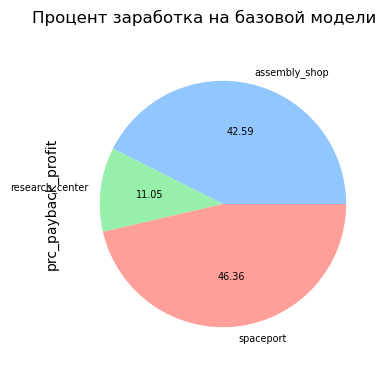

In [35]:
building_type = pd.DataFrame()

building_type['event_ammount'] = df.groupby('building_type')['event'].count()
building_type['user_ammount'] = df.groupby(['building_type']).agg({'user_id':'nunique'})



building_type['sum_payback'] = (building_type['event_ammount']) * 0.07

building_type['frequency_hour'] = building_type['event_ammount']/32/24
building_type['prc_payback_exp'] = building_type['sum_payback']/ad_costs['cost'].sum()*100
building_type['prc_payback_profit'] = building_type['sum_payback']/building_type['sum_payback'].sum()*100




building_int = building_type['prc_payback_profit'].plot(kind='pie', subplots=True, figsize=(15,4), 
                            autopct="%.2f", fontsize=7, legend = False, 
                            title = 'Процент заработка на базовой модели');

display(building_type)


Чаще всего строится `spaceport`, соответственно, большая часть окупится за счет постройки spaceportов и `аssembly_shop`. Эта информация будет полезна, если все-таки часть базовой модели останется в игре. 

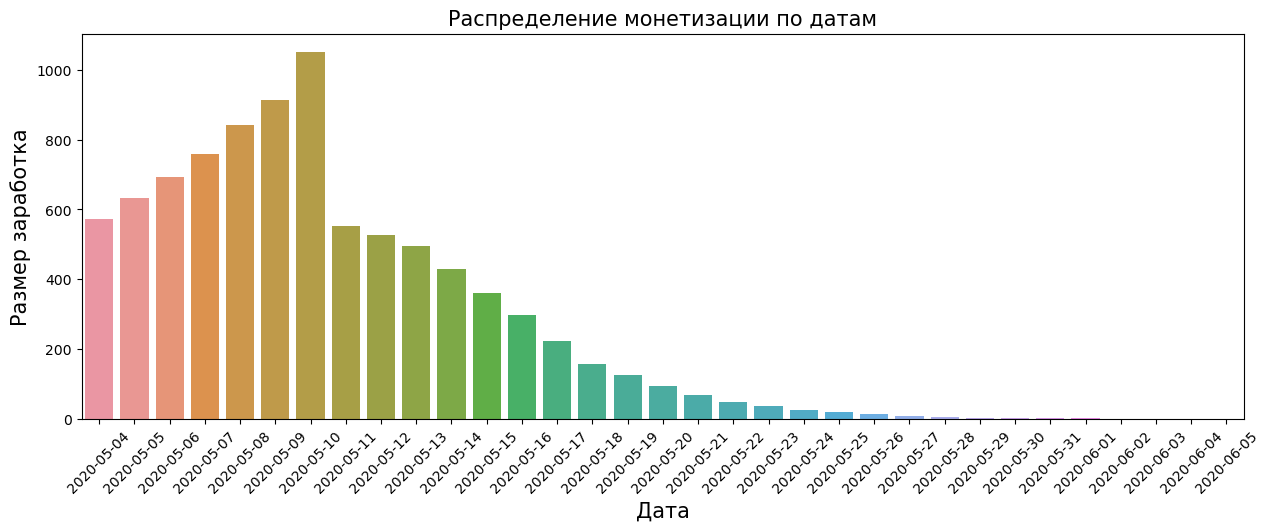

In [36]:
fig = plt.figure(figsize=(15, 5));
sns.barplot(x='date', y='sum_building', data=midle_event)
plt.title('Распределение монетизации по датам', fontsize = 15);
plt.xlabel('Дата', fontsize = 15);
plt.ylabel('Размер заработка', fontsize = 15);
plt.xticks(rotation=45);

Монетизация по базовой модели окупит все рекламные затраты за 25 дней. Это хорошая модель, но вопрос в том, чтобы сохранить вовлеченность пользователей.  

## Шаг 4. Оценить окупаемость рекламы по новой модели

У нас достаточно жесткие рамки для реализации новой модели. Контракты с рекламодателями уже составлены, а внедрение новых механик монетизации потребуют много времени. Поэтому у нас не так много вариантов.

Мы можем использовать базовую модель, но поставить на нее ограничение: например, демонстрация рекламы в режиме строительства начинается с 3 постройки.

Такая модель потребует немного больше времени на окупаемость, но должна не так критично влиять на вовлеченность пользователей.

Посчитаем, какое количество зданий в начале игры мы можем поставить на "cooldown" перед началом демонстрации:

In [37]:
#Фильтруем датасет по необходимому виду событий:
buildings = df.query('event == "building"')

#Считаем количество событий (и демонстраций) на каждого пользователя за весь период:
users_buildings = buildings.groupby('user_id')['event'].count().reset_index()
print('\n Общее количество построенных зданий и демонстраций:{}'.format(buildings['event'].count()))
print('\n Среднее количество зданий на пользователя за весь период:{}'.format(round(users_buildings['event'].mean())))

#Считаем какие здания необходимы для окупаемости:
need_buildings = (buildings['event'].count()*0.07)/ad_costs['cost'].sum()
print('\n Сумма выручки от зданий по старой модели:{}'.format(round(buildings['event'].count()*0.07)))
print('\n Сумма затрат на рекламу:{}'.format(round(ad_costs['cost'].sum())))
print('\n Каждое {} здание необходимо для того, чтобы реклама окупилась по базовой модели.'.format(round(need_buildings, 2)))

#Сколько будет демонстрироваться рекламы на одного пользователя по новой модели:
new_model =  ((need_buildings - round(need_buildings)) * (users_buildings['event'].mean()))
new_model_1 = round(users_buildings['event'].mean() - new_model)
print('\n Среднее количество демонстраций рекламы по новой модели:{}'.format(new_model_1))

#Проверяем окупаемость:
users_buildings['event'] = (users_buildings['event'] - 1).clip(0)
payback_sum = ((users_buildings['event'].sum()))*0.07
print('\n Сумма выручки за тот же период по новой модели:{}'.format(round(payback_sum)))
users_buildings['payback'] = users_buildings['event']*0.07
sum_event = users_buildings['event'].sum()
print('\n Общее количество демонстраций при новой модели:{}'.format(round(sum_event)))
days = (ad_costs['cost'].sum()/users_buildings['payback'].sum())*30
print('\n Срок окупаемости затрат при новой модели:', round(days), 'дней')



 Общее количество построенных зданий и демонстраций:127955

 Среднее количество зданий на пользователя за весь период:9

 Сумма выручки от зданий по старой модели:8957

 Сумма затрат на рекламу:7604

 Каждое 1.18 здание необходимо для того, чтобы реклама окупилась по базовой модели.

 Среднее количество демонстраций рекламы по новой модели:8

 Сумма выручки за тот же период по новой модели:8007

 Общее количество демонстраций при новой модели:114379

 Срок окупаемости затрат при новой модели: 28 дней


## По базовой модели критично почти каждое здание для окупаемости. 

При модификации этой модели, демонстрация рекламы производится с одним пропуском (т.е. для новых игроков просмотр рекламы начинается с постройки 2 здания), что увеличивает срок окупаемости с 25 дней, на 28 дней. Однако модифицированная модель направлена на удержание пользователя и окупает затраты на рекламу. 

In [38]:
# код ревьюера
rev_N = 2
rev_game_actions = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\rev_game_actions.csv')

rev_buildings = rev_game_actions[rev_game_actions["event"] == "building"].groupby("user_id")["event"].count().reset_index()
rev_buildings["watch"] = rev_buildings.apply(lambda x: max(x["event"] - rev_N, 0), axis=1)
rev_income = rev_buildings["watch"].sum()*0.07
print(f"total income {rev_income}")

del rev_N
del rev_game_actions
del rev_buildings
del rev_income

total income 7060.340000000001


## Шаг 5. Проверка гипотез.

#### Проверить гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

       H0 = Среднее время прохождения уровня не различается
       H1 = Среднее время прохождения уровня различается
       

In [39]:
#Фильруем данные по победам:
build = df.query('project_type == "satellite_orbital_assembly"')['user_id'].to_list()
war = df.query('(event == "finished_stage_1") and (user_id != @build)')['user_id'].to_list()

#Формируем датасеты для вычисления первой и последней даты интересующих событий:
hypo_1_p1 = df.groupby('user_id')['event_datetime'].min().reset_index().rename(columns = {'event_datetime' : 'datetime_min'})
hypo_1_p2 = df.groupby('user_id')['event_datetime'].max().reset_index().rename(columns = {'event_datetime' : 'datetime_max'})

#Соединяем полученные данные в единый датасет:
hypo_1 = hypo_1_p1.merge(hypo_1_p2, how = 'left')
hypo_1['days'] = (hypo_1['datetime_max'] - hypo_1['datetime_min']).astype('timedelta64[D]')

In [40]:
#Фильтруем полученный датасет по типу побед:
builder = hypo_1.query('user_id == @build')
warrior = hypo_1.query('user_id == @war')

In [41]:
#Проводим t-тест:

alpha = 0.05

results = sts.ttest_ind(builder['days'], warrior['days'])
pvalue = results.pvalue
print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу, время прохождения уровня различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, время прохождения уровня не различается")

print('В среднем: {:.0f} дней при победе над врагом и {:.0f} дней при реализации проекта' \
                  .format(hypo_1.query('user_id == @war')['days'].mean(), \
                          hypo_1.query('user_id == @build')['days'].mean()))

p-значение:  1.8882835392369192e-97
Отвергаем нулевую гипотезу, время прохождения уровня различается
В среднем: 11 дней при победе над врагом и 13 дней при реализации проекта


#### Проверить статистически значимые различия в количестве рекламных показов по старой модели и по новой.

       H0 = Среднее количество рекламных показов не различается
       H1 = Среднее количество рекламных показов различается

In [42]:
#Фильтруем датасет по типу событий и создаем датасет по базовой модели для проверки гипотезы:
building_model = df.query('event == "building"')
base_model = building_model.groupby('user_id')['event'].count().reset_index()

#Формируем датасет для новой модели:
new_model = building_model.groupby('user_id')['event'].count().reset_index()
new_model['event'] = new_model['event']-1

In [43]:
#Проводим t-тест:

alpha = 0.05

results = sts.ttest_ind(base_model['event'], new_model['event'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, количество рекламных показов различается")
else:
    print("Не получилось отвергнуть нулевую гипотезу, количество построек у игроков не различается")
print('В среднем: {:.0f} рекламных показов у одного игрока по базовой модели и {:.0f} рекламных показов у одного игрока по новой модели' \
                  .format(round(base_model['event'].mean(), 2), \
                          round(new_model['event'].mean(), 2)))

p-значение:  3.2139192066734483e-100
Отвергаем нулевую гипотезу, количество рекламных показов различается
В среднем: 9 рекламных показов у одного игрока по базовой модели и 8 рекламных показов у одного игрока по новой модели


## Вывод

- Гипотеза подтверждается:

        Имеются статистически значимые различия во времени прохождения уровня по разным стратегиям. В среднем, скорость прохождения уровня при стратегии, по которой происходит победа над противником выше. 

- Гипотеза подтверждается:

        Имеются статистически значимые различия в количестве рекламныйх показов по старой и новой модели. Количество рекламы по новой модели должно уменьшиться. 
        
**Вывод по исследованию:**

    Исходя из полученных данных мы делаем вывод, что привязка монетизации к демонстрации рекламы во время нахождения игрока в режиме строительства сохраняет за заказчиком контроль окупаемости, но без проведения эксперимента мы не можем сделать выводы о сохранении вовлеченности игроков при такой модели.  
    
    Была предложена модификация базовой модели, при которой рекламные показы начинаются с 2-ого появления игрока в режиме строительства (или с пропуском 1 рекламы). Исходя из полученных данных мы делаем вывод, что окупаемость по времени смещается и снижает количество рекламных показов на одного игрока. Опять-таки для такой модели так же нужно провести эксперимент. 
   
    Если говорить по анализу источников, то первостепенное предпочтение стоит отдать `yandex_direct` т.к. он использует больше сервисов, привлекает больше игроков и вовлеченных пользователей от него больше. Непонятно, насколько количество внедренных денег влияет на "отдачу" источника - причиной такого скачка может быть именно то, что в яндекс.директ вложили больше всего денег, по сравнению с другими источниками. Для более подробного анализа требуется больше данных. 


- Рекомендации для дальнейшего развития монетизации с привязкой к изменению механики монетизации: 

        Можно попробовать реализовать модель, при которой демонстрация рекламы происходит лимитировано в течение дня. Конечно же будет хорошо, чтобы игрок за просмотр рекламы получал какой-то профит, опять-таки мог лимитированно смотреть рекламу для получения выгоды. Примеры профита: алмазы, части уникальных строений или предметов, уникальные ресурсы, ускорение времени постройки зданий.

        Обязательную рекламу можно оставить на постройке части зданий и на остальные события.

## Материалы

https://disk.yandex.ru/i/cDalYrInq9gSkA - презентация